In [428]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
import numpy as np


import seaborn as sns


import keras


In [429]:
data = web.get_data_yahoo('MSFT',start = "2010-01-01",
                            end = "2022-02-13")

train = web.get_data_yahoo("MSFT",
                            start = "2010-01-01",
                            end = "2022-01-14")

test = web.get_data_yahoo("MSFT",
                            start = "2022-01-14",
                            end = "2022-02-13")



train.shape

(3031, 6)

In [ ]:
# code for NVDA data

# data = web.get_data_yahoo('NVDA',start = "2010-01-01",
#                             end = "2022-02-13")

# train = web.get_data_yahoo("NVDA",
#                             start = "2010-01-01",
#                             end = "2022-01-14")

# test = web.get_data_yahoo("NVDA",
#                             start = "2022-01-14",
#                             end = "2022-02-13")

In [ ]:
# code for FB data

# data = web.get_data_yahoo('FB',start = "2010-01-01",
#                             end = "2022-02-13")

# train = web.get_data_yahoo("FB",
#                             start = "2010-01-01",
#                             end = "2022-01-14")

# test = web.get_data_yahoo("FB",
#                             start = "2022-01-14",
#                             end = "2022-02-13")

C:\Users\micha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


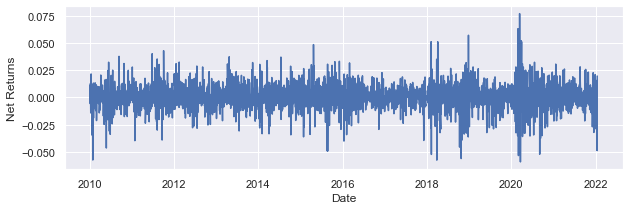

In [427]:
# calculating the returns 
fig = plt.figure(figsize = (10,3))

train['Net_Returns'] = np.divide(train['Close'],train['Open'])-1

sns.lineplot(train.index,train['Net_Returns'])

plt.ylabel('Net Returns')

plt.show()
fig.savefig('net_returns_train.png') 
plt.close(fig) 

In [393]:
train_arr = np.array(train.Close).reshape(-1,1)
train_arr.shape

(3031, 1)

In [394]:
normalizer = MinMaxScaler((0,1))
normalized_train = normalizer.fit_transform(train)

In [395]:
inputs = list()
targets = list()

lr_days = 60
train_len = train_arr.shape[0]

for day in range(lr_days, train_len):
    
    inputs.append(normalized_train[day-lr_days:day, 0])
    
    targets.append(normalized_train[day, 0])
    
inputs = np.array(inputs)
inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))

targets = np.array(targets)
print(inputs.shape)
print(targets)#5486

(2971, 60, 1)
[0.01961085 0.0190593  0.01872223 ... 0.91953422 0.91178181 0.88095602]


In [413]:
lstm_net = keras.Sequential(
    [
    
    keras.layers.LSTM(50,return_sequences = True,input_shape = (inputs.shape[1], 1)),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),


    keras.layers.LSTM(50),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units=1)

    ]
)

In [396]:
inputs.shape[1]

60

In [397]:
lstm_net.compile(
    optimizer = 'adam', 
    metrics = ['accuracy'],
    loss = 'mean_squared_error')

In [401]:
lstm_net.fit(inputs, targets, epochs = 150, batch_size = 32)

Epoch 1/150
93/93 [==============================] - 24s 256ms/step - loss: 2.8161e-04 - accuracy: 6.7317e-04
Epoch 2/150
93/93 [==============================] - 27s 288ms/step - loss: 2.9019e-04 - accuracy: 6.7317e-04
Epoch 3/150
93/93 [==============================] - 23s 254ms/step - loss: 2.8670e-04 - accuracy: 6.7317e-04
Epoch 4/150
93/93 [==============================] - 26s 282ms/step - loss: 3.3586e-04 - accuracy: 6.7317e-04
Epoch 5/150
93/93 [==============================] - 24s 262ms/step - loss: 2.8192e-04 - accuracy: 6.7317e-04
Epoch 6/150
93/93 [==============================] - 24s 259ms/step - loss: 2.9063e-04 - accuracy: 6.7317e-04
Epoch 7/150
93/93 [==============================] - 23s 251ms/step - loss: 2.8376e-04 - accuracy: 6.7317e-04
Epoch 8/150
93/93 [==============================] - 17s 188ms/step - loss: 2.6684e-04 - accuracy: 6.7317e-04
Epoch 9/150
93/93 [==============================] - 20s 221ms/step - loss: 2.7771e-04 - accuracy: 6.7317e-04
Epoch 10/1

93/93 [==============================] - 10s 109ms/step - loss: 2.4162e-04 - accuracy: 6.7317e-04
Epoch 148/150
93/93 [==============================] - 10s 109ms/step - loss: 2.4552e-04 - accuracy: 6.7317e-04
Epoch 149/150
93/93 [==============================] - 10s 109ms/step - loss: 2.5647e-04 - accuracy: 6.7317e-04
Epoch 150/150
93/93 [==============================] - 10s 114ms/step - loss: 2.3291e-04 - accuracy: 6.7317e-04


In [404]:
print(lstm_net.summary())

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_180 (LSTM)             (None, 60, 50)            10400     
                                                                 
 dropout_176 (Dropout)       (None, 60, 50)            0         
                                                                 
 lstm_181 (LSTM)             (None, 60, 50)            20200     
                                                                 
 dropout_177 (Dropout)       (None, 60, 50)            0         
                                                                 
 lstm_182 (LSTM)             (None, 60, 50)            20200     
                                                                 
 dropout_178 (Dropout)       (None, 60, 50)            0         
                                                                 
 lstm_183 (LSTM)             (None, 60, 50)          

In [405]:
test_targets = np.array(test.Close).reshape(-1,1)
test_targets.shape


(20, 1)

In [406]:


days_all = data.shape[0]
days_test = test.shape[0]

days_rem = days_all-lr_days-days_test
test_x = normalizer.fit_transform(np.array(data.Close[days_rem:]).reshape(-1,1))

last_day = lr_days + days_test
test_i = list()
for day in range(lr_days, last_day):
    
    test_i.append(test_x[day-lr_days:day, 0])
    
test_i = np.array(test_i)

preds = normalizer.inverse_transform(lstm_net.predict(test_i))




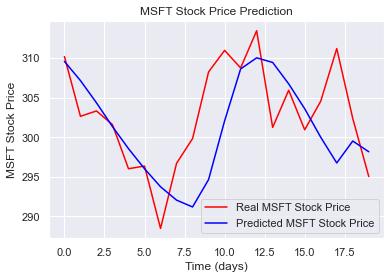

In [407]:
# plt.plot(test_targets, color = 'red', label = 'Real MSFT Stock Price')
# plt.plot(preds, color = 'blue', label = 'Predicted MSFT Stock Price')
# plt.title('MSFT Stock Price Prediction')
# plt.xlabel('Time (days)')
# plt.ylabel('MSFT Stock Price')
# plt.legend()
# plt.show()

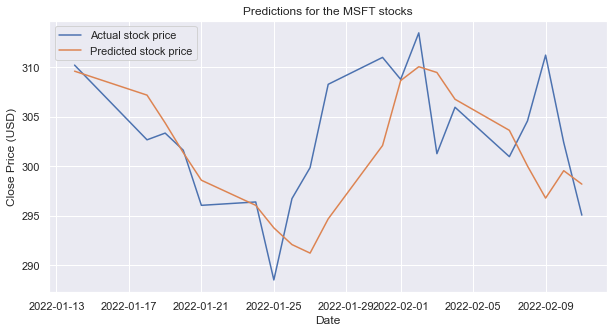

In [412]:
sns.set()
fig = plt.figure(figsize = (10,5))

sns.lineplot(x=test.index,y=test['Close'])
sns.lineplot(x=test.index,y=np.squeeze(preds)).set(title='Predictions for the MSFT stocks')
plt.legend(labels=["Actual stock price","Predicted stock price"])
plt.ylabel("Close Price (USD)")

plt.show()
fig.savefig('MSFT.png') 
plt.close(fig) 



In [166]:
# testing the code using other datasets

In [420]:
# baseline model 
baseline_net = keras.Sequential(
    [
    keras.layers.SimpleRNN(50, input_shape=(inputs.shape[1],1), activation='linear'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units=1, activation='linear')

    ]
)

baseline_net.compile(
    optimizer = 'adam', 
    metrics = ['accuracy'],
    loss = 'mean_squared_error')

In [421]:
baseline_net.fit(inputs, targets, epochs = 150, batch_size = 32)

Epoch 1/150
93/93 [==============================] - 6s 39ms/step - loss: 0.0174 - accuracy: 3.3659e-04
Epoch 2/150
93/93 [==============================] - 4s 39ms/step - loss: 0.0026 - accuracy: 6.7317e-04
Epoch 3/150
93/93 [==============================] - 4s 39ms/step - loss: 0.0019 - accuracy: 6.7317e-04
Epoch 4/150
93/93 [==============================] - 4s 40ms/step - loss: 0.0017 - accuracy: 6.7317e-04
Epoch 5/150
93/93 [==============================] - 4s 39ms/step - loss: 0.0012 - accuracy: 6.7317e-04
Epoch 6/150
93/93 [==============================] - 4s 40ms/step - loss: 0.0012 - accuracy: 6.7317e-04
Epoch 7/150
93/93 [==============================] - 4s 41ms/step - loss: 0.0014 - accuracy: 6.7317e-04
Epoch 8/150
93/93 [==============================] - 4s 43ms/step - loss: 0.0012 - accuracy: 6.7317e-04
Epoch 9/150
93/93 [==============================] - 4s 41ms/step - loss: 0.0012 - accuracy: 6.7317e-04
Epoch 10/150
93/93 [==============================] - 4s 39ms/st

93/93 [==============================] - 4s 45ms/step - loss: 1.8282e-04 - accuracy: 6.7317e-04


In [422]:
print(baseline_net.summary())



Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dropout_194 (Dropout)       (None, 50)                0         
                                                                 
 dense_32 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________
None


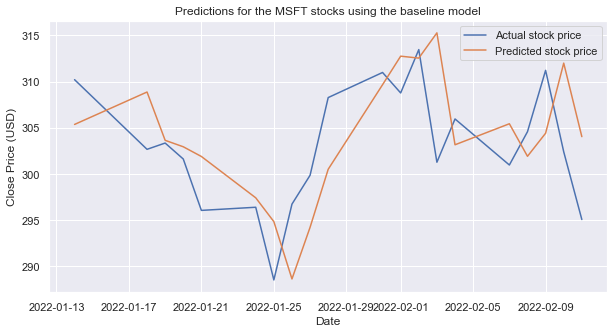

In [423]:
test_targets = np.array(test.Close).reshape(-1,1)

days_all = data.shape[0]
days_test = test.shape[0]

days_rem = days_all-lr_days-days_test
test_x = normalizer.fit_transform(np.array(data.Close[days_rem:]).reshape(-1,1))

last_day = lr_days + days_test
test_i = list()
for day in range(lr_days, last_day):
    
    test_i.append(test_x[day-lr_days:day, 0])
    
test_i = np.array(test_i)

preds = normalizer.inverse_transform(baseline_net.predict(test_i))

###

sns.set()
fig = plt.figure(figsize = (10,5))

sns.lineplot(x=test.index,y=test['Close'])
sns.lineplot(x=test.index,y=np.squeeze(preds)).set(title='Predictions for the MSFT stocks using the baseline model')
plt.legend(labels=["Actual stock price","Predicted stock price"])
plt.ylabel("Close Price (USD)")

plt.show()
fig.savefig('baseline.png') 
plt.close(fig) 
